<h1 style="text-align: center;"> Prelims Demography Tutorial 1 - Population Measures </h1>
<h2 style="text-align: center;"> Python Solution </h2>

Load the required packages and set up the paths

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from pathlib import Path

data_path = Path('').resolve().parents[0] / 'data'

# Question 1
Load the data

In [2]:
data_1 = pd.read_csv(data_path / 'mort.csv')

## a & b

In [3]:
# calculate column sums
data_1.loc[data_1.shape[0], :] = ['total'] + data_1.drop(columns=['age']).apply(np.sum, axis=0).tolist()

# deaths / population
data_1['coal_cdr'] = data_1['coal_deaths'] / data_1['coal_pop']
data_1['engine_cdr'] = data_1['engine_deaths'] / data_1['engine_pop']
data_1['ew_cdr'] = data_1['ew_deaths'] / data_1['ew_pop']

# reorder columns for better readability
data_1 = data_1[['age', 'coal_pop', 'coal_deaths', 'coal_cdr', 'engine_pop', 'engine_deaths', 'engine_cdr', 'ew_pop', 'ew_deaths', 'ew_cdr']]
data_1

,age,coal_pop,coal_deaths,coal_cdr,engine_pop,engine_deaths,engine_cdr,ew_pop,ew_deaths,ew_cdr
0,15-24,25230.0,160.0,0.006342,11820.0,70.0,0.005922,3063620.0,15754.0,0.005142
1,25-34,32840.0,278.0,0.008465,14240.0,71.0,0.004986,2944620.0,16466.0,0.005592
2,35-44,44160.0,732.0,0.016576,15910.0,169.0,0.010622,3150180.0,37976.0,0.012055
3,45-54,33680.0,1865.0,0.055374,16530.0,252.0,0.015245,3224010.0,114007.0,0.035362
4,55-64,18100.0,4182.0,0.231050,21170.0,2438.0,0.115163,2540300.0,275752.0,0.108551
5,total,154010.0,7217.0,0.046861,79670.0,3000.0,0.037655,14922730.0,459955.0,0.030822


### Visualisation - seaborn

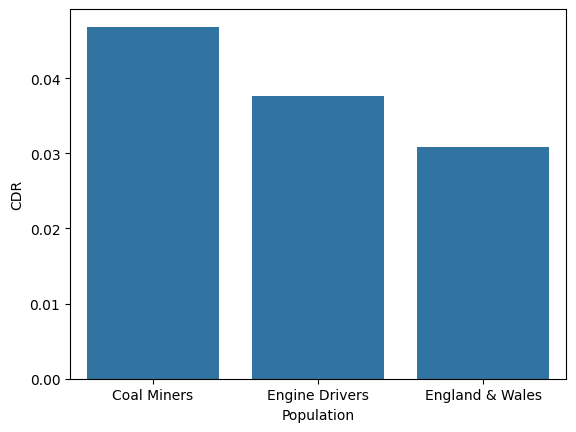

In [4]:
# bar chart showing the CDR
data_1_cdr = data_1.loc[data_1['age'] == 'total', ['coal_cdr', 'engine_cdr', 'ew_cdr']].transpose().reset_index()
data_1_cdr.columns = ['Population', 'CDR']

sns.barplot(data=data_1_cdr, x='Population', y='CDR')
plt.xticks(ticks=range(3), labels=['Coal Miners', 'Engine Drivers', 'England & Wales'])
plt.show()

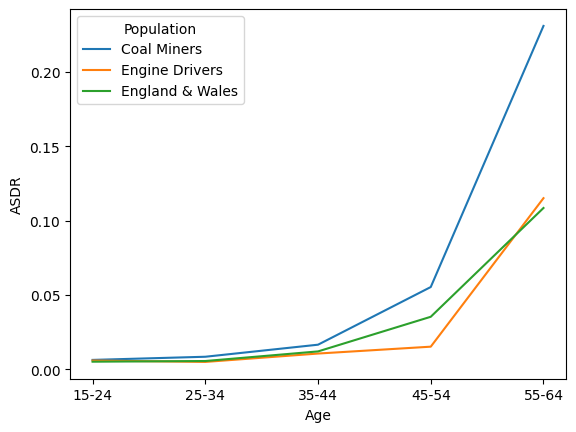

In [5]:
# line chart showing the ASDR by population
# firstly, transform the data to long format
data_1_long = data_1.loc[data_1['age'] != 'total', ['age', 'coal_cdr', 'engine_cdr', 'ew_cdr']].melt(id_vars='age', 
                                                                                                     value_vars=['coal_cdr', 'engine_cdr', 'ew_cdr'], 
                                                                                                     var_name='population', 
                                                                                                     value_name='asdr')

# plot the data
sns.lineplot(data=data_1_long, x='age', y='asdr', hue='population', errorbar=None)
plt.ylabel('ASDR')
plt.xlabel('Age')
plt.legend(title='Population', labels=['Coal Miners', 'Engine Drivers', 'England & Wales'])
plt.show()

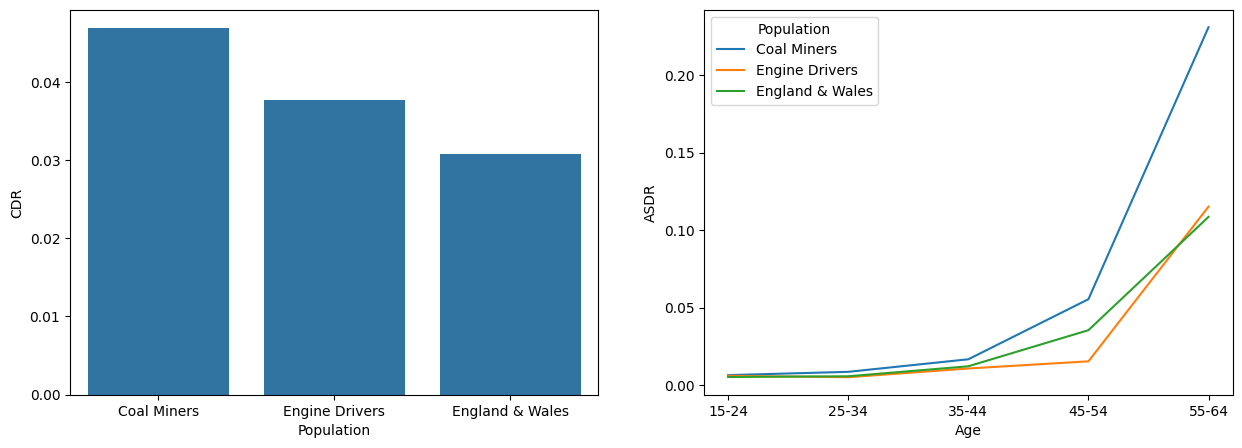

In [6]:
# combine the two plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# bar chart
sns.barplot(data=data_1_cdr, x='Population', y='CDR', ax=ax[0])
ax[0].set_xticks(range(3))
ax[0].set_xticklabels(['Coal Miners', 'Engine Drivers', 'England & Wales'])

# line chart
sns.lineplot(data=data_1_long, x='age', y='asdr', hue='population', ax=ax[1], errorbar=None)
ax[1].set_ylabel('ASDR')
ax[1].set_xlabel('Age')
ax[1].legend(title='Population', labels=['Coal Miners', 'Engine Drivers', 'England & Wales'])

plt.show()

# save the plot
fig.savefig(Path('').resolve().parents[0] / 'output' / 'q1.png')

### Visualisation - plotly

In [7]:
# bar chart showing the CDR
data_1_cdr = data_1.loc[data_1['age'] == 'total', ['coal_cdr', 'engine_cdr', 'ew_cdr']].transpose().reset_index()
data_1_cdr.columns = ['Population', 'CDR']

fig = px.bar(data_1_cdr, x='Population', y='CDR')
fig.update_xaxes(tickvals=data_1_cdr['Population'], ticktext=['Coal Miners', 'Engine Drivers', 'England & Wales'])
fig.show()

In [8]:
# line chart showing the ASDR by population
# firstly, transform the data to long format
data_1_long = data_1.loc[data_1['age'] != 'total', ['age', 'coal_cdr', 'engine_cdr', 'ew_cdr']].melt(id_vars='age',
                                                                                                     value_vars=['coal_cdr', 'engine_cdr', 'ew_cdr'],
                                                                                                     var_name='population',
                                                                                                     value_name='asdr')

# plot the data
fig = px.line(data_1_long, x='age', y='asdr', color='population')
fig.update_yaxes(title='ASDR')
fig.update_xaxes(title='Age')
fig.update_legends(title='Population')
legend_text = {'coal_cdr':'Coal Miners', 'engine_cdr': 'Engine Drivers', 'ew_cdr': 'England & Wales'}
fig.for_each_trace(lambda t: t.update(name = legend_text[t.name],
                                      legendgroup = legend_text[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, legend_text[t.name])
                                      )
                   )
fig.show()

In [9]:
# combine the two plots
fig = make_subplots(rows=1, cols=2)

# bar chart
fig1 = px.bar(data_1_cdr, x='Population', y='CDR')
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# update x-axis labels on the main fig
fig.update_xaxes(title='Population', 
                 tickvals=data_1_cdr['Population'].unique().tolist(), 
                 ticktext=['Coal Miners', 'Engine Drivers', 'England & Wales'], row=1, col=1)
fig.update_yaxes(title='CDR', row=1, col=1)

# line chart
fig2 = px.line(data_1_long, x='age', y='asdr', color='population')
legend_text = {'coal_cdr':'Coal Miners', 'engine_cdr': 'Engine Drivers', 'ew_cdr': 'England & Wales'}
fig2.for_each_trace(lambda t: t.update(name = legend_text[t.name],
                                       legendgroup = legend_text[t.name],
                                       hovertemplate = t.hovertemplate.replace(t.name, legend_text[t.name])
                                       )
                    )
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)

# update y-axis and x-axis titles on the main fig
fig.update_yaxes(title='ASDR', row=1, col=2)
fig.update_xaxes(title='Age', row=1, col=2)

fig.show()

# save the plot
fig.write_image(Path('').resolve().parents[0] / 'output' / 'q1_px.png')

# Question 2
Load the data

In [10]:
data_2_uk = pd.read_csv(data_path / 'fert_uk.csv')
data_2_tw = pd.read_csv(data_path / 'fert_tw.csv')

## a

In [11]:
# crude birth rate: births / population
cbr_uk_1977 = data_2_uk['birth_1977'].sum() / 46639000
cbr_uk_1991 = data_2_uk['birth_1991'].sum() / 47875000
cbr_uk_2011 = data_2_uk['birth_2011'].sum() / 53107000

cbr_tw_1977 = data_2_tw['birth_1977'].sum() / 17043000
cbr_tw_1991 = data_2_tw['birth_1991'].sum() / 20679000
cbr_tw_2011 = data_2_tw['birth_2011'].sum() / 23269000

cbr_uk_1977, cbr_uk_1991, cbr_uk_2011, cbr_tw_1977, cbr_tw_1991, cbr_tw_2011

(0.014087737730225777,
 0.016548678851174933,
 0.015210330088312275,
 0.023096461890512232,
 0.0154591614681561,
 0.008524130817826292)

## b

In [12]:
# age-specific fertility rate: births / female population (by age group)
data_2_uk['asfr_1977'] = data_2_uk['birth_1977'] / data_2_uk['fe_1977']
data_2_uk['asfr_1991'] = data_2_uk['birth_1991'] / data_2_uk['fe_1991']
data_2_uk['asfr_2011'] = data_2_uk['birth_2011'] / data_2_uk['fe_2011']

data_2_tw['asfr_1977'] = data_2_tw['birth_1977'] / data_2_tw['fe_1977']
data_2_tw['asfr_1991'] = data_2_tw['birth_1991'] / data_2_tw['fe_1991']
data_2_tw['asfr_2011'] = data_2_tw['birth_2011'] / data_2_tw['fe_2011']

# reorder columns for better readability
data_2_uk = data_2_uk[['age', 'birth_1977', 'fe_1977', 'asfr_1977', 'birth_1991', 'fe_1991', 'asfr_1991', 'birth_2011', 'fe_2011', 'asfr_2011']]
data_2_tw = data_2_tw[['age', 'birth_1977', 'fe_1977', 'asfr_1977', 'birth_1991', 'fe_1991', 'asfr_1991', 'birth_2011', 'fe_2011', 'asfr_2011']]

In [13]:
data_2_uk

,age,birth_1977,fe_1977,asfr_1977,birth_1991,fe_1991,asfr_1991,birth_2011,fe_2011,asfr_2011
0,12–14,245,1378305,0.000178,264,986001,0.000268,178,1094706,0.000163
1,15–19,63292,2136119,0.029629,59446,1813821,0.032774,40817,1935671,0.021087
2,20–24,202547,1929861,0.104954,196219,2204982,0.088989,149688,2124051,0.070473
3,25–29,237852,2004320,0.118670,282106,2347928,0.120151,223639,2159449,0.103563
4,30–34,115572,1933440,0.059775,182660,2108221,0.086642,231686,2074311,0.111693
5,35–39,30251,1604278,0.018856,60546,1897848,0.031902,129164,2091808,0.061748
6,40–44,6753,1557029,0.004337,10450,2059599,0.005074,30606,2337446,0.013094
7,45–49,517,1620499,0.000319,526,1768420,0.000297,1869,2352582,0.000794
8,50–54,9,1698277,0.000005,51,1544472,0.000033,128,2077603,0.000062


In [14]:
data_2_tw

,age,birth_1977,fe_1977,asfr_1977,birth_1991,fe_1991,asfr_1991,birth_2011,fe_2011,asfr_2011
0,12–14,370,591021,0.000626,271,582321,0.000465,30,427914,0.000070
1,15–19,34819,958644,0.036321,14710,886212,0.016599,2817,772923,0.003645
2,20–24,171043,882888,0.193731,84703,919253,0.092143,17705,768372,0.023042
3,25–29,142380,692273,0.205670,142918,960312,0.148825,60196,906135,0.066432
4,30–34,31981,440825,0.072548,62800,918613,0.068364,82387,1016100,0.081082
5,35–39,10372,452138,0.022940,12931,832855,0.015526,30744,916172,0.033557
6,40–44,2402,396350,0.006060,1273,596838,0.002133,4324,926477,0.004667
7,45–49,194,349213,0.000556,47,432533,0.000109,131,953483,0.000137
8,50–54,72,285352,0.000252,27,428939,0.000063,14,902003,0.000016


### Visualisation - seaborn

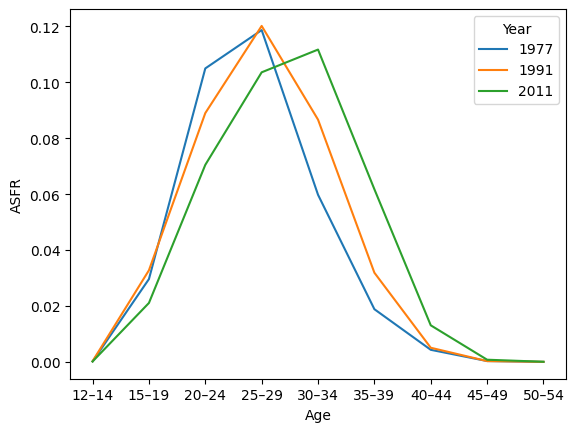

In [15]:
# line chart showing the UK ASFR
# firstly, transform the data to long format
data_2_uk_long = data_2_uk.loc[:, ['age', 'asfr_1977', 'asfr_1991', 'asfr_2011']].melt(id_vars='age',
                                                                                       value_vars=['asfr_1977', 'asfr_1991', 'asfr_2011'],
                                                                                       var_name='year',
                                                                                       value_name='asfr')

# plot the data
sns.lineplot(data=data_2_uk_long, x='age', y='asfr', hue='year', errorbar=None)
plt.ylabel('ASFR')
plt.xlabel('Age')
plt.legend(title='Year', labels=['1977', '1991', '2011'])
plt.show()

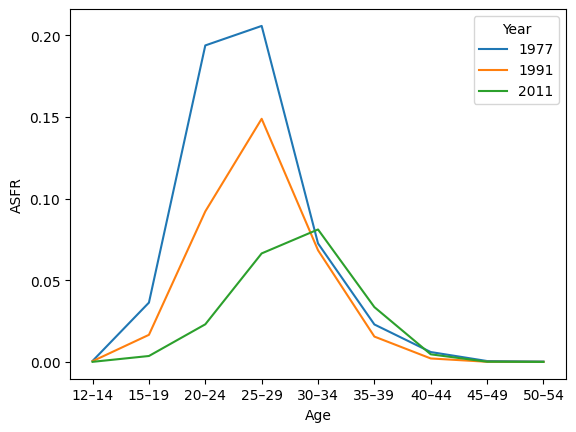

In [16]:
# line chart showing the TW ASFR
# firstly, transform the data to long format
data_2_tw_long = data_2_tw.loc[:, ['age', 'asfr_1977', 'asfr_1991', 'asfr_2011']].melt(id_vars='age',
                                                                                       value_vars=['asfr_1977', 'asfr_1991', 'asfr_2011'],
                                                                                       var_name='year',
                                                                                       value_name='asfr')

# plot the data
sns.lineplot(data=data_2_tw_long, x='age', y='asfr', hue='year', errorbar=None)
plt.ylabel('ASFR')
plt.xlabel('Age')
plt.legend(title='Year', labels=['1977', '1991', '2011'])
plt.show()

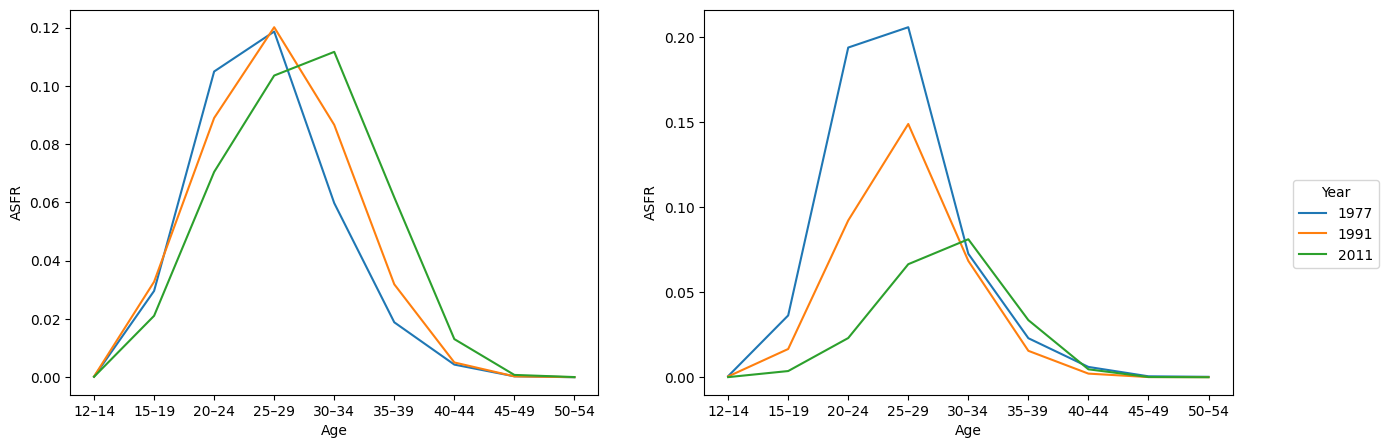

In [17]:
# combine the two plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# UK ASFR
sns.lineplot(data=data_2_uk_long, x='age', y='asfr', hue='year', ax=ax[0])
ax[0].set_ylabel('ASFR')
ax[0].set_xlabel('Age')

# TW ASFR
sns.lineplot(data=data_2_tw_long, x='age', y='asfr', hue='year', ax=ax[1])
ax[1].set_ylabel('ASFR')
ax[1].set_xlabel('Age')

# Add a single legend to the figure
handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles=handles[0:], labels=['1977', '1991', '2011'], loc='right', title='Year')

# Remove the legend from the subplots
ax[0].get_legend().remove()
ax[1].get_legend().remove()

plt.show()

# save the plot
fig.savefig(Path('').resolve().parents[0] / 'output' / 'q2.png')

### Visualisation - plotly

In [18]:
# line chart showing the UK ASFR by year
# firstly, transform the data to long format
data_2_uk_long = data_2_uk.loc[:, ['age', 'asfr_1977', 'asfr_1991', 'asfr_2011']].melt(id_vars='age',
                                                                                       value_vars=['asfr_1977', 'asfr_1991', 'asfr_2011'],
                                                                                       var_name='year',
                                                                                       value_name='asfr')

# plot the data
fig = px.line(data_2_uk_long, x='age', y='asfr', color='year')
fig.update_yaxes(title='ASFR')
fig.update_xaxes(title='Age')
fig.update_legends(title='Year')
legend_text = {'asfr_1977':'1977', 'asfr_1991': '1991', 'asfr_2011': '2011'}
fig.for_each_trace(lambda t: t.update(name = legend_text[t.name],
                                      legendgroup = legend_text[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, legend_text[t.name])
                                      )
                   )
fig.show()

In [19]:
# line chart showing the TW ASFR by year
# firstly, transform the data to long format
data_2_tw_long = data_2_tw.loc[:, ['age', 'asfr_1977', 'asfr_1991', 'asfr_2011']].melt(id_vars='age',
                                                                                       value_vars=['asfr_1977', 'asfr_1991', 'asfr_2011'],
                                                                                       var_name='year',
                                                                                       value_name='asfr')

# plot the data
fig = px.line(data_2_tw_long, x='age', y='asfr', color='year')
fig.update_yaxes(title='ASFR')
fig.update_xaxes(title='Age')
fig.update_legends(title='Year')
legend_text = {'asfr_1977':'1977', 'asfr_1991': '1991', 'asfr_2011': '2011'}
fig.for_each_trace(lambda t: t.update(name = legend_text[t.name],
                                      legendgroup = legend_text[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, legend_text[t.name])
                                      )
                   )
fig.show()

In [29]:
# combine the two plots
fig = make_subplots(rows=1, cols=2)

# UK ASFR
fig1 = px.line(data_2_uk_long, x='age', y='asfr', color='year')
legend_text = {'asfr_1977':'1977', 'asfr_1991': '1991', 'asfr_2011': '2011'}
fig1.for_each_trace(lambda t: t.update(name = legend_text[t.name],
                                       legendgroup = legend_text[t.name],
                                       hovertemplate = t.hovertemplate.replace(t.name, legend_text[t.name])
                                       )
                    )
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
    
# update y-axis and x-axis titles on the main fig
fig.update_yaxes(title='ASFR', row=1, col=1)
fig.update_xaxes(title='Age', row=1, col=1)

# TW ASFR
fig2 = px.line(data_2_tw_long, x='age', y='asfr', color='year')
legend_text = {'asfr_1977':'1977', 'asfr_1991': '1991', 'asfr_2011': '2011'}
fig2.for_each_trace(lambda t: t.update(name = legend_text[t.name],
                                       legendgroup = legend_text[t.name],
                                       hovertemplate = t.hovertemplate.replace(t.name, legend_text[t.name])
                                       )
                    )
for trace in fig2.data:
    trace.showlegend = False
    fig.add_trace(trace, row=1, col=2)
    
# update y-axis and x-axis titles on the main fig
fig.update_yaxes(title='ASFR', row=1, col=2)
fig.update_xaxes(title='Age', row=1, col=2)

fig.show()

# save the plot
fig.write_image(Path('').resolve().parents[0] / 'output' / 'q2_px.png')

## c

In [21]:
# total fertility rate: sum of ASFR (be aware of the age interval)
def calculate_tfr(data):
    tfr = data[0] * 3 + data[1:].sum() * 5
    return tfr

tfr_uk = data_2_uk[['asfr_1977', 'asfr_1991', 'asfr_2011']].apply(calculate_tfr, axis=0)
tfr_uk.index = ['1977', '1991', '2011']

tfr_tw = data_2_tw[['asfr_1977', 'asfr_1991', 'asfr_2011']].apply(calculate_tfr, axis=0)
tfr_tw.index = ['1977', '1991', '2011']

In [22]:
tfr_uk

1977    1.683266
1991    1.830115
2011    1.913053
dtype: float64

In [23]:
tfr_tw

1977    2.692272
1991    1.720202
2011    1.063096
dtype: float64

### Visualisation - seaborn

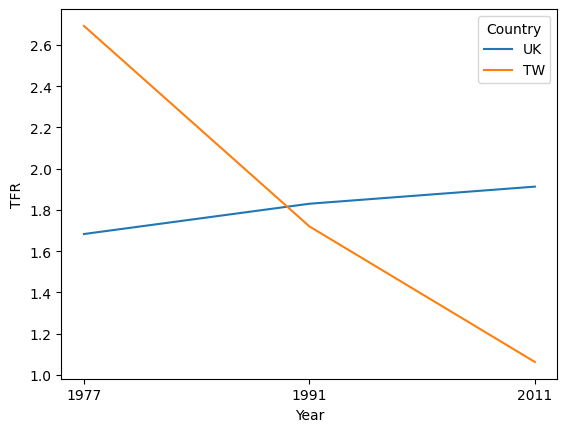

In [32]:
# line chart showing the TFR by country
tfr = pd.concat([tfr_uk, tfr_tw], axis=1).transpose().reset_index()
tfr['index'] = ['UK', 'TW']

# transform the data to long format
tfr_long = tfr.melt(id_vars='index', value_vars=['1977', '1991', '2011'], var_name='year', value_name='tfr')

# plot the data
sns.lineplot(data=tfr_long, x='year', y='tfr', hue='index', errorbar=None)
plt.ylabel('TFR')
plt.xlabel('Year')
plt.legend(title='Country')

# save the plot
plt.savefig(Path('').resolve().parents[0] / 'output' / 'q2_tfr.png')

plt.show()

### Visualisation - plotly

In [31]:
# line chart showing the TFR by country
tfr = pd.concat([tfr_uk, tfr_tw], axis=1).transpose().reset_index()
tfr['index'] = ['UK', 'TW']

# transform the data to long format
tfr_long = tfr.melt(id_vars='index', value_vars=['1977', '1991', '2011'], var_name='year', value_name='tfr')

# plot the data
fig = px.line(tfr_long, x='year', y='tfr', color='index')
fig.update_yaxes(title='TFR')
fig.update_xaxes(title='Year')
fig.update_legends(title='Country')
fig.show()

# save the plot
fig.write_image(Path('').resolve().parents[0] / 'output' / 'q2_tfr_px.png')